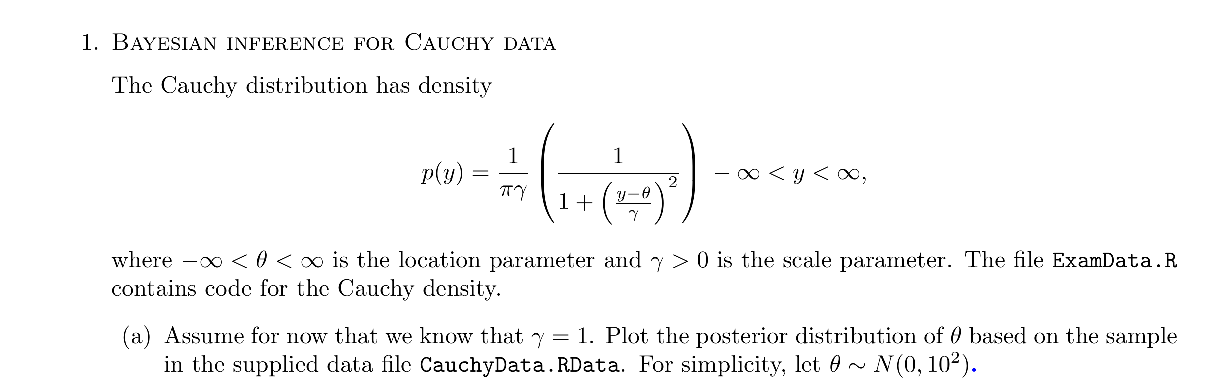

In [1]:
source('ExamData.R')
par(family  = "Arial")
#install.packages("showtext")
library(showtext)
showtext_auto()

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: sysfonts
Loading required package: showtextdb


In [8]:
dCauchy

function (x, theta = 0, gamma = 1) 
{
    return(dens = (1/(pi * gamma)) * (1/(1 + ((x - theta)/gamma)^2)))
}

In [9]:
load(file = 'CauchyData.RData')


In [10]:
yVect

[1]   0.6998204  -2.6262449  47.6768351   0.6700209 -12.8219034  12.5559292
 [7]   4.8522075  29.0727619  -1.1310636   1.6798153  13.4086107   8.2253337
[13]   2.5208931  13.5322452  18.8262567   8.5266843  20.5828877  15.3994587
[19]   2.6503274   3.0063014  12.5425728  24.1111586  20.9258191   2.9588694
[25] -28.9218653  12.4560472  -8.6656114   8.3723852   5.5917571   7.9371703
[31] -13.8922212   7.7702125 -15.8917369  -6.3750719  11.2428005   1.9118950
[37]   4.6147637   5.7314619 -51.4725190  10.2591344   7.2923163   3.3958879
[43]   5.7964353   8.0435975 -62.3142308  11.6195606   4.9364979   4.7751857
[49]  20.9803554  -2.0257188

In [11]:

logpost = function(theta,x,gamma=1){
    
        sum(log(dCauchy(yVect, theta, gamma = 1))) + dnorm(theta, mean = 0, sd = 10, log = TRUE) 
}

In [14]:
thetagrid = seq(0,12,0.01)
#bandwidth = thetagrid[2] - thetagrid[1]

In [15]:
postDraws = numeric(length(thetagrid))

In [16]:
for(i in 1:length(thetagrid)){
    postDraws[i] = logpost(thetagrid[i],x=yVect,gamma = 1)
}

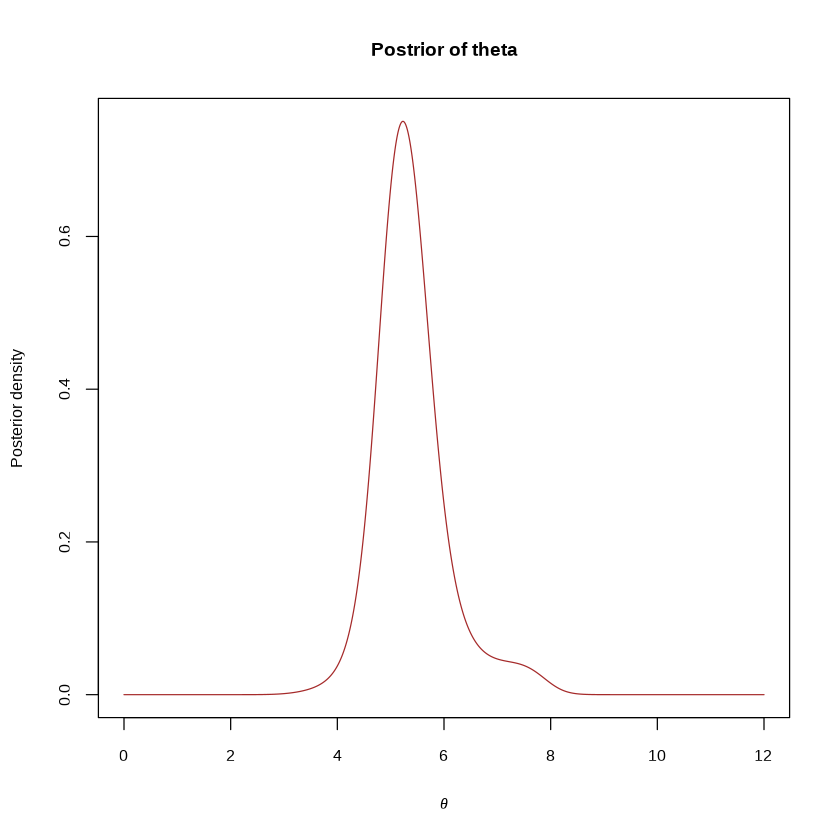

In [17]:
plot(x=thetagrid,y =(1/0.01)* exp(postDraws)/sum(exp(postDraws)),type = 'l',col = 'brown',main= 'Postrior of theta',
    xlab=expression(theta),ylab = 'Posterior density')

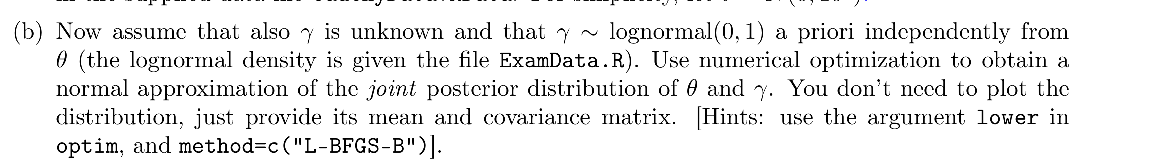

In [18]:
dlognormal

function (x, mu, sigma2) 
{
    return(dens = (1/(sqrt(2 * pi * sigma2) * x)) * exp((-1/(2 * 
        sigma2)) * (log(x) - mu)^2))
}

In [34]:
logPos.B = function(Param,data){
    
    theta = Param[1]
    gamma = Param[2]
    logpost = sum(log(dCauchy(x = data,theta ,gamma ) ))
                      + dnorm(x = theta,mean = 0,sd = 10,log = TRUE) +
                  log(dlognormal(x=gamma,mu = 0,sigma2 = 1)) 
    return(logpost)
}

In [39]:
initVal = c(1,1)
optimRes = optim(par = initVal,fn = logPos.B,yVect,gr = NULL,control = list(fnscale = -1),hessian = TRUE,
                 method = c("L-BFGS-B"),lower = c(-Inf,0.0001), upper = c(Inf,Inf))

In [50]:
cat("\n mean : \t",optRes$par)
cat("\n the covariance matrix")
-solve(optimRes$hessian)


 mean : 	 6.134326 5.470767
 the covariance matrix

1.285543,0.077274
0.077274,1.128861


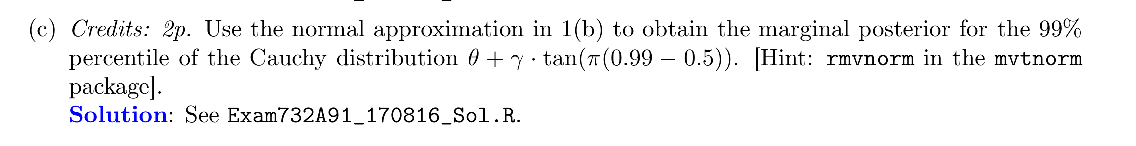

In [52]:
library(mvtnorm)
draws = rmvnorm(10000,mean =optRes$par,sigma = -solve(optimRes$hessian) )

In [55]:
marginSample = draws[,1] + draws[,2]*tan(pi&(0.99 - 0.5 ))

In [56]:
quantile(marginSample)

0%       25%       50%       75%      100% 
 5.868261 13.259284 14.624575 16.049062 23.078099

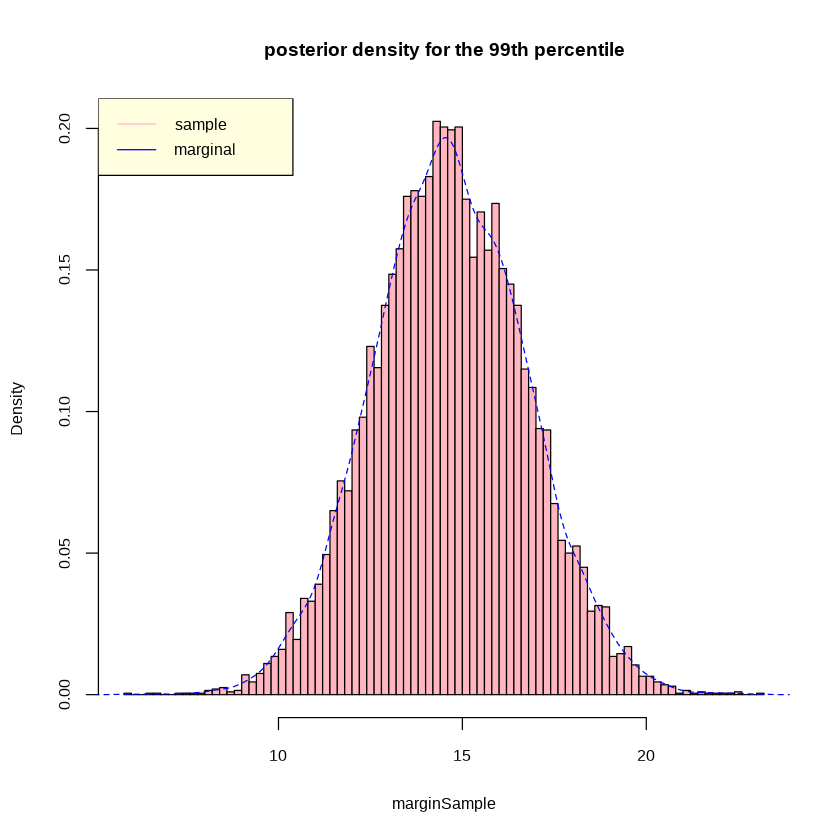

In [69]:
hist(marginSample,breaks = 100,freq = FALSE,col = 'lightpink',main='posterior density for the 99th percentile')
lines(density(marginSample),col='blue',lty=2)
legend('topleft',col = c("lightpink",'blue'),c('sample ','marginal' ),lty =c(1,1),bg = 'lightyellow')